In [1239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1240]:
plt.style.use("ggplot")

## Origen de los datos

Los datos se han obtenido desde dos fuentes diferentes y combinados para complementarse. La primera fuente ha sido una base de datos en formato ***csv*** de la plataforma ***kaggle***. La segunda fuente de datos ha sido el acceso a una API gratuita de la plataforma ***RAWG.io***. La descarga de estos datos se ha realizado en un notebook adjunto en este mismo proyecto. El detalle de los datos descargados se presenta a continuación.

### Base de datos original de Kaggle

La base de datos original que proviene de Kaggle posee las siguientes columnas:

- Rank: Esta columna no se utilizará ya que es solo un orden del total de ventas
- Name: Nombre del videojuego
- Franchise: Franquicia a la que pertenece el videojuego
- Platform: Plataforma a la que pertenece el videojuego, es posible que el videojuego este presente en mas de una plataforma como entrada separada
- Year: Año de lanzamiento del videojuego
- Genre: Genero al que pertenece el videojuego
- Publisher: Empresa responsable de la publicación del videojuego
- NA_Sales: Ventas en norteamérica (en millones de unidades)
- EU_Sales: Ventas en europa (en millones de unidades)
- JP_Sales: Ventas en japón (en millones de unidades)
- Other_Sales: Ventas en el resto del mundo (en millones de unidades)
- Global_Sales: Ventas globales que corresponden a la suma de las tres columnas anteriores

La base de datos ha sido descargada desde https://www.kaggle.com/datasets/gregorut/videogamesales

### Información adicional de la API de RAWG.io

De parte de la base de datos obtenida utilizando la API de **RAWG.io** se agregarán las siguientes columnas para complementar la base de datos descrita en el punto anterior:

- playtime: horas de juego promedio que ofrece el videojuego
- metacritic: puntaje agregado del sitio metacritic que corresponde al *critics score*, es decir, puntaje de criticos especializados
- rating: puntaje agregado del sitio RAWG.io, es decir, que corresponde a usuarios de los videojuegos
- exceptional: numero de valoraciones con clasificacion *exceptional*
- recommended: numero de valoraciones con clasificacion *recommended*
- meh: numero de valoraciones con clasificacion *meh*
- skip: numero de valoraciones con clasificación *skip*
- esrb_rating: clasificación de rango etario recomendado para el videojuego
- rawg_name: nombre del videojuego almacenado en RAWG.io para comprobar que el videojuego es el correcto

La documnentación de la API de RAWG se puede encontrar en https://rawg.io/apidocs

## Carga de Datos

In [1241]:
df = pd.read_csv("videogame_data_final.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,...,Global_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating,rawg_name
0,0,0,1,Wii Sports,NaN,Wii,2006.0,Sports,Nintendo,41.49,...,82.74,55.0,76.0,4.20,88.0,138.0,23.0,5.0,NaN,Wii Sports
1,1,1,2,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,...,40.24,30.0,NaN,4.31,331.0,364.0,51.0,15.0,NaN,Super Mario Bros.
2,2,2,3,Mario Kart Wii,Mario,Wii,2008.0,Racing,Nintendo,15.85,...,35.82,12.0,82.0,4.30,111.0,174.0,14.0,2.0,Everyone,Mario Kart Wii
3,3,3,4,Wii Sports Resort,NaN,Wii,2009.0,Sports,Nintendo,15.75,...,33.00,2.0,80.0,4.22,51.0,68.0,10.0,4.0,Everyone,Wii Sports Resort
4,4,4,5,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,...,31.37,33.0,NaN,4.39,291.0,173.0,36.0,18.0,NaN,"Pokémon Red, Blue, Yellow"


## Descripción de Datos

### Información general

Se observa que hay un gran numero de elementos nulos los que deberán ser imputados siguiendo algún procedimiento adecuado que se mostrará en las secciones siguientes, donde se detallará el procedimiento utilizado para cada una de las columnas.

Por otro lado, se observa que pandas reconoce correctamente los tipos de datos correctos para cada columna, por lo que no se hace necesario modificarlos.

Finalmente, las columnas ***Unnamed: 0.1, Unnamed: 0, Rank, Global_Sales y rawg_name*** son columnas que son redundante o tienen información irrelevanta, por lo que se eliminarán.

In [1242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  16598 non-null  int64  
 1   Unnamed: 0    16598 non-null  int64  
 2   Rank          16598 non-null  int64  
 3   Name          16598 non-null  object 
 4   Franchise     7993 non-null   object 
 5   Platform      16598 non-null  object 
 6   Year          16327 non-null  float64
 7   Genre         16598 non-null  object 
 8   Publisher     16540 non-null  object 
 9   NA_Sales      16598 non-null  float64
 10  EU_Sales      16598 non-null  float64
 11  JP_Sales      16598 non-null  float64
 12  Other_Sales   16598 non-null  float64
 13  Global_Sales  16598 non-null  float64
 14  playtime      15869 non-null  float64
 15  metacritic    5622 non-null   float64
 16  rating        15869 non-null  float64
 17  exceptional   8524 non-null   float64
 18  recommended   10458 non-nu

### Descripción de variables numéricas

Se realiza una descripción general de las variables numéricas del dataset. Se pueden obtener las siguientes conclusiones:

- En la columna ***playtime*** el máximo es 900 horas. Esto es extraño para un videojuego, por lo que se analizará el caso en particular en la sección respectiva.
- De la misma forma, los 3 primeros cuartiles de la variable ***playtime*** son cero. Esto también es extraño y se analizará en la seccion particular.
- En las 4 columnas de ***Sales: NA_Sales, EU_Sales, JP_Sales, Other_Sales*** el primer cuartil es cero y en el caso de ***JP_Sales*** el segundo cuartil es cero. Sin embargo, en la columna ***Global_Sales*** no hay cuartiles cero y el mínimo no es cero. Esto quiere decir que hay un gran número de juegos que no tienen ventas en otras regiones y solo tienen pequeñas ventas en una región en particular. Esto se considera como algo normal para una industria competitiva.
- La columna ***metacritic*** posee un alto numero de datos nulos. Esto será analizado en la sección respectiva.
- La columna ***rating*** posee al menos sobre el 25% de datos con valor 0. Esto no es normal y será tratado en la sección respectiva.
- El máximo de la columna ***exceptional*** es mayor que ***recommended*** y a su vez ***recommended*** es mayor que ***meh*** y así sucesivamente. Esto sugiere una directa relación entre la cantidad de personas jugando el videojuego y personas realizando una valoración positiva. Por lo tanto, es esperable que el numero de ventas también se vea influenciado al mismo tiempo por el rating de los usuarios.

In [1243]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip
count,16598.000000,16598.000000,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,15869.000000,5622.000000,15869.000000,8524.000000,10458.000000,9687.000000,8706.000000
mean,8298.500000,8298.500000,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441,2.927721,72.751690,1.921011,74.110981,86.068177,33.638278,13.769125
std,4791.574219,4791.574219,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028,13.085557,12.788603,1.863129,268.555782,213.961730,75.365035,26.152291
min,0.000000,0.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4149.250000,4149.250000,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,65.000000,0.000000,2.000000,3.000000,2.000000,2.000000
50%,8298.500000,8298.500000,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000,75.000000,2.610000,7.000000,13.000000,7.000000,4.000000
75%,12447.750000,12447.750000,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000,2.000000,82.000000,3.760000,32.000000,54.000000,27.000000,12.000000
max,16597.000000,16597.000000,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,900.000000,99.000000,4.830000,5200.000000,2383.000000,919.000000,396.000000


### Descripción de variables no numéricas

Se realiza una descripción de las variables no numéricas del dataset. Se pueden obtener las siguientes conclusiones:

- Las columnas ***esrb_rating*** y ***Franchise*** son las que tienes la mayor cantidad de datos faltantes. Esto será tratado en las secciones respectivas.

In [1244]:
df.describe(exclude="number")

,Name,Franchise,Platform,Genre,Publisher,esrb_rating,rawg_name
count,16598,7993,16598,16598,16540,7865,15869
unique,11491,470,31,12,578,6,8975
top,Need for Speed: Most Wanted,NBA,DS,Action,Electronic Arts,Teen,Jikkyou Powerful Pro Yakyuu 2014
freq,12,190,2163,3316,1351,2751,58


## Data Wrangling

### Eliminación de columnas repetidas o sin información relevante

Como fue señalado anteriormente, las columnas ***Unnamed: 0.1, Unnamed: 0, Rank, Global_Sales y rawg_name*** son redundante o no aportan información relevante, por las razones siguientes:

- ***Unnamed: 0.1 y Unnamed: 0***: Estas columnas aparecen por repetidas cargas y guardados en formato ***csv*** y corresponden al ***index*** de un dataframe. Por lo tanto, no poseen información relevante.
- ***Rank***: Corresponde al ranking ordenado por cantidad global de ventas de videojuegos según el dataset de ***Kaggle***. Esto puede ser calculado con los datos de ventas ya existentes en el dataset, por lo tanto, es redundante.
- ***Global_Sales***: Corresponde a las ventas totales mundiales y por lo tanto es la suma de las columnas de ventas ***NA_Sales, EU_Sales, JP_Sales y Other_Sales***, por lo tanto, es redundante.
- ***rawg_name***: Es el dato del nombre del videojuego según la API de ***RAWG.io***. El valor del nombre del videojuego ya está presente en el dataset de ***Kaggle***, por lo tanto, es redundante.


In [1245]:
delete_cols = ["Unnamed: 0.1", "Unnamed: 0", "Rank", "Global_Sales", "rawg_name"]
df.drop(columns=delete_cols, inplace=True)
df.head()

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
0,Wii Sports,NaN,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,55.0,76.0,4.20,88.0,138.0,23.0,5.0,NaN
1,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,30.0,NaN,4.31,331.0,364.0,51.0,15.0,NaN
2,Mario Kart Wii,Mario,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,12.0,82.0,4.30,111.0,174.0,14.0,2.0,Everyone
3,Wii Sports Resort,NaN,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,2.0,80.0,4.22,51.0,68.0,10.0,4.0,Everyone
4,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,33.0,NaN,4.39,291.0,173.0,36.0,18.0,NaN


### Tratamiendo de valores Nulos

#### Columna: Playtime

Como se señalo anteriormente, existen datos nulos en esta columna y además el máximo es de 900 horas, lo que es probablemente incorrecto. Se realizan la siguientes correcciones.

- Se buscará cual es el videojuego que tiene esta cantidad de horas y se buscará en internet un valor mas adecuado. Luego, se reemplazará ese dato por el valor correcto en el DataFrame.
- Los valores nulos serán imputados por la media agrupada por ***Genre*** ya que es razonable pensar que la duración de un videojuego sea similar a los videojuegos de un mismo tipo.

##### Videojuego con 900 horas

Se identifica que el videojuego con esta cantidad de horas corresponde a ***Pokemon Gold/Pokemon Silver***. Según el sitio web ***[Nintenderos](https://www.nintenderos.com/2022/02/los-juegos-de-la-serie-principal-de-pokemon-ordenados-segun-su-duracion/#:~:text=9%20Pok%C3%A9mon%20Oro%2C%20Plata%20y,Blanco%20y%20Negro%20(32%20horas))*** la duración estimada de este videojuego es de alrededor de 30.5 horas. Por lo tanto, se reemplazará este valor en el dataset.

In [1246]:
# Se busca el valor con 900 horas
df[df.playtime > 500]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
12,Pokemon Gold/Pokemon Silver,Pokemon,GB,1999.0,Role-Playing,Nintendo,9.0,6.18,7.2,0.71,900.0,NaN,4.38,248.0,139.0,21.0,21.0,NaN


In [1247]:
# Se reemplaza el valor correcto de la variable "playtime"
df.at[12, "playtime"] = 30.5

In [1248]:
# Se verifica el valor ingresado
df.iloc[12]["playtime"]

30.5

##### Videojuegos con 0 horas

Se observa un alto número de datos con la variable ***playtime*** igual a cero, siendo 10461 en total. Esto debe corresponder a un error en los registros de RAWG.io o la inexistencia de dichos valores. Por lo tanto, se reemplazarán como valores nulos.

Luego de finalizar este proceso, tenemos un total de 5408 datos no nulos.

In [1249]:
# Se calcula la cantidad de elementos con "playtime" == 0
df[df.playtime == 0]["playtime"].count()

10461

In [1250]:
# Se reemplazan los valores 0 con nulo
df["playtime"] = df["playtime"].replace(0, np.nan)

In [1251]:
df["playtime"].describe()

count    5408.000000
mean        8.430196
std        17.520214
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       239.000000
Name: playtime, dtype: float64

##### Imputación de valores nulos

Se considera que la duración de un videojuego debiera ser similar a otros videojuegos similares. Es decir, se considerará que es adecuado rellenar por la mediana del ***playtime*** agrupado por ***Genre***. El procedimiento sera el siguiente:
- Se realizará una comparación entre promedio y mediana del ***playtime*** agrupado por ***Genre*** de forma de determinar si los valores de tendencia central son similares y por lo tanto las muestras normales.
- Se reemplazará por la mediana de los valores.

In [1252]:
playtime_by_genre_mean = df[["playtime", "Genre"]].groupby("Genre").mean()
playtime_by_genre_mean = playtime_by_genre_mean.rename({"playtime": "mean"}, axis="columns")

playtime_by_genre_median = df[["playtime", "Genre"]].groupby("Genre").median()
playtime_by_genre_median = playtime_by_genre_median.rename({"playtime": "median"}, axis="columns")


playtime_grouped_by_genre = pd.concat(
    [playtime_by_genre_mean, playtime_by_genre_median], axis=1)

playtime_grouped_by_genre

,mean,median
Genre,,
Action,8.772424,4.0
Adventure,5.423611,4.0
Fighting,5.588832,4.0
Misc,4.907543,3.0
Platform,5.744275,3.0
Puzzle,3.512605,3.0
Racing,7.357868,3.0
Role-Playing,14.106574,5.0
Shooter,5.608696,3.0


Se guarda un DataFrame de prueba conteniendo los elementos con playtime nulo del género ***Action***. Se espera que luego del proceso los valores reemplazados sean ***4.0 horas*** como se muestra en el DataFrame anterior.

In [1253]:
test = df[(df.Genre == "Action") & (df.playtime.isna())]

Se reemplazan los valores agrupados por ***Genre***.

In [1254]:
df.loc[df["playtime"].isna(), "playtime"] = \
    df["Genre"].map(playtime_grouped_by_genre["mean"])

Como puede observarse en el siguiente DataFrame, los valores de prueba fueron reemplazados por el valor esperado de ***4.0 horas***.

In [1255]:
df.iloc[test.index]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
45,Pokemon HeartGold/Pokemon SoulSilver,Pokemon,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,8.772424,87.0,4.38,263.0,124.0,20.0,26.0,NaN
82,FIFA Soccer 13,FIFA,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.772424,NaN,0.00,3.0,NaN,1.0,NaN,NaN
138,Driver,NaN,PS,1999.0,Action,GT Interactive,3.11,2.80,0.02,0.33,8.772424,85.0,4.05,44.0,114.0,25.0,3.0,Teen
185,FIFA Soccer 13,FIFA,X360,2012.0,Action,Electronic Arts,1.08,3.48,0.03,0.58,8.772424,NaN,0.00,3.0,NaN,1.0,NaN,NaN
223,Driver 2,NaN,PS,2000.0,Action,Atari,2.36,2.10,0.02,0.25,8.772424,62.0,4.07,28.0,65.0,14.0,2.0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16550,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,NaN,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,8.772424,NaN,0.00,NaN,NaN,NaN,NaN,NaN
16564,Original Frisbee Disc Sports: Ultimate & Golf,NaN,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,8.772424,NaN,0.00,NaN,NaN,NaN,NaN,NaN
16567,Fujiko F. Fujio Characters: Great Assembly! Sl...,NaN,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,8.772424,NaN,0.00,NaN,NaN,NaN,NaN,NaN
16582,Planet Monsters,NaN,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,8.772424,NaN,0.00,NaN,NaN,NaN,NaN,NaN


#### Columnas de ratings: *exceptional, recommended, meh y skip*

Se considera como supuesto sus valores nulos significan que no se han realizado valoraciones en dichas categorías, por lo tanto, se rellenan con valor ***cero***.

In [1256]:
# Los ratings nulos se asumirán que no existen reviews con dicha categoría
# por lo tanto se rellenan con cero
df[["exceptional", "recommended", "meh", "skip"]] = df[["exceptional", "recommended", "meh", "skip"]].fillna(0)

#### Columnas: NA_Sales, EU_Sales, JP_Sales y Other_Sales

Se observa que no existen valores nulos para las columnas de ventas. Sin embargo, existe una entrada en donde los tres valores son cero. Este valor debe ser eliminado.

In [1257]:
print("Cantidad de nulos NA_Sales =", df[df["NA_Sales"].isna()]["NA_Sales"].count())
print("Cantidad de nulos EU_Sales =", df[df["EU_Sales"].isna()]["NA_Sales"].count())
print("Cantidad de nulos JP_Sales =", df[df["JP_Sales"].isna()]["NA_Sales"].count())
print("Cantidad de nulos Other_Sales =", df[df["Other_Sales"].isna()]["NA_Sales"].count())

Cantidad de nulos NA_Sales = 0
Cantidad de nulos EU_Sales = 0
Cantidad de nulos JP_Sales = 0
Cantidad de nulos Other_Sales = 0


Elemento con ventas globales con valor cero.

In [1258]:
df[(df["NA_Sales"] == 0) & (df["EU_Sales"] == 0) & (df["JP_Sales"] == 0) & (df["Other_Sales"] == 0)]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
16595,SCORE International Baja 1000: The Official Game,NaN,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,7.357868,NaN,0.0,0.0,0.0,0.0,0.0,NaN


Se elimina el valor anteriormente calculado.

In [1259]:
df = df.drop(index=16288)

Se comprueba que el dato fue elimminado.

In [1260]:
df[(df["NA_Sales"] == 0) & (df["EU_Sales"] == 0) & (df["JP_Sales"] == 0) & (df["Other_Sales"] == 0)]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
16595,SCORE International Baja 1000: The Official Game,NaN,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,7.357868,NaN,0.0,0.0,0.0,0.0,0.0,NaN


#### Columna: rating

Como se comentó en la descripción de los datos, existe alrededor de un 25% de los rating con valor 0. Esto no es normal ya que esto debe significar que no hay valoraciones para dichos videojuegos. Se imputarán como datos nulos para luego tratarlos como tales.

Por otro lado, en esta columna, que corresponde al rating de los videojuegos según la API de [***RAWG.io***](https://rawg.io/apidocs), resulta razonable completar los datos restantes utilizando la mediana de la columna ***rating*** agrupadas por ***Publisher***. Esto debido a que es esperable que un mismo publisher tenga una recepción similar por parte de la audiencia.

##### Imputación de valores 0

Se transforman los valores 0 a ***NaN***. La descripción de los datos resulta mas representativa luego de la imputación de los valores cero.

In [1261]:
df["rating"] = df["rating"].replace(0, np.nan)

In [1262]:
df["rating"].describe()

count    8368.000000
mean        3.642988
std         0.556171
min         1.000000
25%         3.330000
50%         3.730000
75%         4.060000
max         4.830000
Name: rating, dtype: float64

##### Imputación de los valores nulos

Los valores nulos se imputan por la media agrupada por ***Publisher***. En los casos en que existan ***Publisher*** sin rating, estos serán imputados por la moda global.

In [1263]:
rating_median_by_publisher = df[["Publisher", "rating"]].groupby("Publisher").median()
rating_median_by_publisher

,rating
Publisher,
10TACLE Studios,NaN
1C Company,3.74
20th Century Fox Video Games,NaN
2D Boy,4.01
3DO,3.69
...,...
id Software,4.38
imageepoch Inc.,NaN
inXile Entertainment,3.81


Se calcula la mediana global.

In [1264]:
rating_median = rating_median_by_publisher["rating"].median()
rating_median

3.69

Se reemplazan los valores nulos de las modas por la moda global.

In [1265]:
rating_median_by_publisher["rating"] = rating_median_by_publisher["rating"].fillna(rating_median)
rating_median_by_publisher

,rating
Publisher,
10TACLE Studios,3.69
1C Company,3.74
20th Century Fox Video Games,3.69
2D Boy,4.01
3DO,3.69
...,...
id Software,4.38
imageepoch Inc.,3.69
inXile Entertainment,3.81


Se crea un DataFrame de prueba con valores de ***rating*** nulos para el ***Publisher Nintendo***.

In [1266]:
test = df[(df["rating"].isna()) & (df["Publisher"] == "Nintendo")]
test

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
316,Flash Focus: Vision Training in Minutes a Day,NaN,DS,2007.0,Misc,Nintendo,0.87,1.57,1.05,0.35,1.000000,NaN,NaN,0.0,0.0,0.0,0.0,NaN
320,Big Brain Academy: Wii Degree,NaN,Wii,2007.0,Misc,Nintendo,1.06,1.93,0.41,0.43,4.907543,NaN,NaN,0.0,4.0,0.0,0.0,NaN
374,Kung Fu,NaN,NES,1985.0,Action,Nintendo,1.64,0.38,1.42,0.06,8.772424,NaN,NaN,0.0,1.0,1.0,0.0,Everyone
376,Clubhouse Games,NaN,DS,2006.0,Misc,Nintendo,0.59,1.83,0.73,0.35,4.907543,NaN,NaN,1.0,0.0,0.0,0.0,NaN
402,English Training: Have Fun Improving Your Skills!,NaN,DS,2006.0,Misc,Nintendo,0.00,0.99,2.32,0.02,4.907543,NaN,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,Jet Impulse,NaN,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00,6.819383,NaN,NaN,0.0,0.0,0.0,0.0,NaN
16269,Slide Adventure: Mag Kid,NaN,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,NaN,NaN,0.0,0.0,0.0,0.0,NaN
16357,Mario vs. Donkey Kong: Tipping Stars,Mario,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,3.512605,NaN,NaN,1.0,3.0,0.0,0.0,NaN
16456,Art Academy: Home Studio,NaN,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,4.907543,82.0,NaN,1.0,0.0,0.0,0.0,Everyone


Se reemplazan los valores calculados de la mediana agrupados por ***Publisher***.

In [1267]:
df.loc[df["rating"].isna(), "rating"] = \
    df["Publisher"].map(rating_median_by_publisher["rating"])

Se comprueba el reemplazo de valores en el DataFrame de prueba.

In [1268]:
df.iloc[test.index]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
316,Flash Focus: Vision Training in Minutes a Day,NaN,DS,2007.0,Misc,Nintendo,0.87,1.57,1.05,0.35,1.000000,NaN,4.03,0.0,0.0,0.0,0.0,NaN
320,Big Brain Academy: Wii Degree,NaN,Wii,2007.0,Misc,Nintendo,1.06,1.93,0.41,0.43,4.907543,NaN,4.03,0.0,4.0,0.0,0.0,NaN
374,Kung Fu,NaN,NES,1985.0,Action,Nintendo,1.64,0.38,1.42,0.06,8.772424,NaN,4.03,0.0,1.0,1.0,0.0,Everyone
376,Clubhouse Games,NaN,DS,2006.0,Misc,Nintendo,0.59,1.83,0.73,0.35,4.907543,NaN,4.03,1.0,0.0,0.0,0.0,NaN
402,English Training: Have Fun Improving Your Skills!,NaN,DS,2006.0,Misc,Nintendo,0.00,0.99,2.32,0.02,4.907543,NaN,4.03,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,Jet Impulse,NaN,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00,6.819383,NaN,4.03,0.0,0.0,0.0,0.0,NaN
16269,Slide Adventure: Mag Kid,NaN,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,NaN,4.03,0.0,0.0,0.0,0.0,NaN
16358,Ishin Renka: Ryouma Gaiden,NaN,PSP,2010.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,1.000000,NaN,3.45,0.0,0.0,0.0,2.0,NaN
16457,Juggler DS,NaN,DS,2008.0,Misc,Commseed,0.00,0.00,0.01,0.00,3.000000,73.0,3.97,9.0,14.0,7.0,1.0,NaN


#### Columna: Franchise

Se tomará como supuesto que los valores nulos significan que no pertenecen a una franquicia, por lo tanto, se agrega la categoría ***No Franchise***

In [1269]:
# Los elementos nulos de la columna Franchise, se dejaran como categoria
# No Franchise
df["Franchise"] = df["Franchise"].fillna("No Franchise")

#### Columna: esrb_rating

En esta columna, que corresponde a la clasificación de edad de los videojuegos según la ESRB ([Entertainment Software Rating Board](https://www.esrb.org/ratings-guide/)), resulta razonable completar los datos utilizando la moda de la columna ***esrb_rating*** agrupadas por ***Publisher***. Esto debido a que es esperable que un mismo publisher desarrolle videojuegos para una misma audiencia.

Al evaluar la moda agrupada por ***Publisher***, se nota que hay Publisher con la moda siendo NaN. Esto quiere decir que no existe el dato de ***esrb_rating*** para dichos ***Publisher***. En estos casos, se reemplazara por la moda global.

In [1270]:
esrb_by_publisher_mode = df[["Publisher", "esrb_rating"]].groupby("Publisher").describe(exclude="number")
esrb_by_publisher_mode = esrb_by_publisher_mode.xs("top", axis=1, level=1)
esrb_by_publisher_mode

,esrb_rating
Publisher,
10TACLE Studios,Teen
1C Company,Mature
20th Century Fox Video Games,NaN
2D Boy,Everyone
3DO,Teen
...,...
id Software,Mature
imageepoch Inc.,NaN
inXile Entertainment,NaN


Se calcula la moda global.

In [1271]:
esrb_mode = esrb_by_publisher_mode["esrb_rating"].mode()
esrb_mode

0    Teen
Name: esrb_rating, dtype: object

Se reemplazan los valores nulos de las modas por la moda global.

In [1272]:
esrb_by_publisher_mode["esrb_rating"] = esrb_by_publisher_mode["esrb_rating"].fillna(esrb_mode.iloc[0])
esrb_by_publisher_mode

,esrb_rating
Publisher,
10TACLE Studios,Teen
1C Company,Mature
20th Century Fox Video Games,Teen
2D Boy,Everyone
3DO,Teen
...,...
id Software,Mature
imageepoch Inc.,Teen
inXile Entertainment,Teen


Se crea un DataFrame de prueba con valores de ***esrb_rating*** nulos para el ***Publisher Nintendo***.

In [1273]:
test = df[(df["esrb_rating"].isna()) & (df["Publisher"] == "Nintendo")]
test

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
0,Wii Sports,No Franchise,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,55.000000,76.0,4.20,88.0,138.0,23.0,5.0,NaN
1,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,30.000000,NaN,4.31,331.0,364.0,51.0,15.0,NaN
4,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,33.000000,NaN,4.39,291.0,173.0,36.0,18.0,NaN
5,Tetris,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,3.512605,NaN,4.39,188.0,103.0,18.0,15.0,NaN
6,New Super Mario Bros.,Mario,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,25.000000,89.0,4.16,67.0,169.0,15.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Donkey Kong Jungle Beat,DonkeyKong,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,5.744275,80.0,4.00,3.0,20.0,0.0,1.0,NaN
16123,Nintendogs and Cats Golden Retriever and New F...,No Franchise,3DS,2011.0,Action,Nintendo,0.00,0.01,0.00,0.00,8.772424,NaN,3.60,1.0,4.0,5.0,0.0,NaN
16269,Slide Adventure: Mag Kid,No Franchise,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,NaN,4.03,0.0,0.0,0.0,0.0,NaN
16357,Mario vs. Donkey Kong: Tipping Stars,Mario,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,3.512605,NaN,4.03,1.0,3.0,0.0,0.0,NaN


Se reemplazan los valores calculados de la moda agrupados por ***Publisher***.

In [1274]:
df.loc[df["esrb_rating"].isna(), "esrb_rating"] = \
    df["Publisher"].map(esrb_by_publisher_mode["esrb_rating"])

Se comprueba el reemplazo de valores en el DataFrame de prueba.

In [1275]:
df.iloc[test.index]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
0,Wii Sports,No Franchise,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,55.000000,76.0,4.20,88.0,138.0,23.0,5.0,Everyone
1,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,30.000000,NaN,4.31,331.0,364.0,51.0,15.0,Everyone
4,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,33.000000,NaN,4.39,291.0,173.0,36.0,18.0,Everyone
5,Tetris,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,3.512605,NaN,4.39,188.0,103.0,18.0,15.0,Everyone
6,New Super Mario Bros.,Mario,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,25.000000,89.0,4.16,67.0,169.0,15.0,4.0,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Donkey Kong Jungle Beat,DonkeyKong,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,5.744275,80.0,4.00,3.0,20.0,0.0,1.0,Everyone
16123,Nintendogs and Cats Golden Retriever and New F...,No Franchise,3DS,2011.0,Action,Nintendo,0.00,0.01,0.00,0.00,8.772424,NaN,3.60,1.0,4.0,5.0,0.0,Everyone
16269,Slide Adventure: Mag Kid,No Franchise,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,NaN,4.03,0.0,0.0,0.0,0.0,Everyone
16358,Ishin Renka: Ryouma Gaiden,No Franchise,PSP,2010.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,1.000000,NaN,3.45,0.0,0.0,0.0,2.0,Teen


#### Columna: metacritic

En esta columna, que corresponde a la calificación agregada de la critica especializada [Metacritic](https://www.metacritic.com/game/), resulta razonable completar los datos utilizando la mediana de la columna ***metacritic*** agrupadas por ***Publisher***. Esto debido a que es esperable que un mismo publisher tenga una recepción de la critica similar en sus videojuegos.

Al evaluar la mediana agrupada por ***Publisher***, se nota que hay Publisher con la mediana siendo NaN. Esto quiere decir que no existen datos de ***metacritic*** para dichos ***Publisher***. En estos casos, se reemplazara por la mediana global.

In [1276]:
metacritic_by_publisher_median = df[["Publisher", "metacritic"]].groupby("Publisher").median()
metacritic_by_publisher_median

,metacritic
Publisher,
10TACLE Studios,42.0
1C Company,80.0
20th Century Fox Video Games,NaN
2D Boy,90.0
3DO,39.0
...,...
id Software,85.0
imageepoch Inc.,NaN
inXile Entertainment,NaN


In [1277]:
metacritic_median = metacritic_by_publisher_median["metacritic"].median()
metacritic_median

73.0

In [1278]:
metacritic_by_publisher_median["metacritic"] = metacritic_by_publisher_median["metacritic"].fillna(metacritic_median)
metacritic_by_publisher_median

,metacritic
Publisher,
10TACLE Studios,42.0
1C Company,80.0
20th Century Fox Video Games,73.0
2D Boy,90.0
3DO,39.0
...,...
id Software,85.0
imageepoch Inc.,73.0
inXile Entertainment,73.0


In [1279]:
test = df[(df["metacritic"].isna()) & (df["Publisher"] == "Nintendo")]
test

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
1,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,30.000000,NaN,4.31,331.0,364.0,51.0,15.0,Everyone
4,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,33.000000,NaN,4.39,291.0,173.0,36.0,18.0,Everyone
5,Tetris,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,3.512605,NaN,4.39,188.0,103.0,18.0,15.0,Everyone
9,Duck Hunt,No Franchise,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,5.000000,NaN,3.97,38.0,116.0,25.0,6.0,Everyone
10,Nintendogs,No Franchise,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,6.819383,NaN,3.96,13.0,30.0,9.0,2.0,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,Jet Impulse,No Franchise,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00,6.819383,NaN,4.03,0.0,0.0,0.0,0.0,Everyone
16123,Nintendogs and Cats Golden Retriever and New F...,No Franchise,3DS,2011.0,Action,Nintendo,0.00,0.01,0.00,0.00,8.772424,NaN,3.60,1.0,4.0,5.0,0.0,Everyone
16269,Slide Adventure: Mag Kid,No Franchise,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,NaN,4.03,0.0,0.0,0.0,0.0,Everyone
16357,Mario vs. Donkey Kong: Tipping Stars,Mario,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,3.512605,NaN,4.03,1.0,3.0,0.0,0.0,Everyone


In [1280]:
df.loc[df["metacritic"].isna(), "metacritic"] = \
    df["Publisher"].map(metacritic_by_publisher_median["metacritic"])

In [1281]:
df.iloc[test.index]

,Name,Franchise,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip,esrb_rating
1,Super Mario Bros.,Mario,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,30.000000,81.0,4.31,331.0,364.0,51.0,15.0,Everyone
4,Pokemon Red/Pokemon Blue,Pokemon,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,33.000000,81.0,4.39,291.0,173.0,36.0,18.0,Everyone
5,Tetris,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,3.512605,81.0,4.39,188.0,103.0,18.0,15.0,Everyone
9,Duck Hunt,No Franchise,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,5.000000,81.0,3.97,38.0,116.0,25.0,6.0,Everyone
10,Nintendogs,No Franchise,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,6.819383,81.0,3.96,13.0,30.0,9.0,2.0,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,Jet Impulse,No Franchise,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00,6.819383,81.0,4.03,0.0,0.0,0.0,0.0,Everyone
16123,Nintendogs and Cats Golden Retriever and New F...,No Franchise,3DS,2011.0,Action,Nintendo,0.00,0.01,0.00,0.00,8.772424,81.0,3.60,1.0,4.0,5.0,0.0,Everyone
16269,Slide Adventure: Mag Kid,No Franchise,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,8.772424,81.0,4.03,0.0,0.0,0.0,0.0,Everyone
16358,Ishin Renka: Ryouma Gaiden,No Franchise,PSP,2010.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,1.000000,69.0,3.45,0.0,0.0,0.0,2.0,Teen


#### Columna: Year

En esta instancia no es posible obtener mas datos sobre los años de lanzamiento, por lo que dichas filas seran eliminadas.

In [1282]:
# Se eliminan las filas con años nulos del DataFrame
df = df[~df.Year.isna()]
df.reset_index(inplace=True, drop=True)

#### Columna: Publisher

En esta instancia no es posible obtener mas datos sobre los publishers no existentes, por lo que dichas filas seran eliminadas.

In [1283]:
# Se eliminan las filas con años nulos del DataFrame
df = df[~df.Publisher.isna()]
df.reset_index(inplace=True, drop=True)

#### Descripción del Dataset Resultante posterior al proceso de Data Wrangling

In [1284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16290 non-null  object 
 1   Franchise    16290 non-null  object 
 2   Platform     16290 non-null  object 
 3   Year         16290 non-null  float64
 4   Genre        16290 non-null  object 
 5   Publisher    16290 non-null  object 
 6   NA_Sales     16290 non-null  float64
 7   EU_Sales     16290 non-null  float64
 8   JP_Sales     16290 non-null  float64
 9   Other_Sales  16290 non-null  float64
 10  playtime     16290 non-null  float64
 11  metacritic   16290 non-null  float64
 12  rating       16290 non-null  float64
 13  exceptional  16290 non-null  float64
 14  recommended  16290 non-null  float64
 15  meh          16290 non-null  float64
 16  skip         16290 non-null  float64
 17  esrb_rating  16290 non-null  object 
dtypes: float64(12), object(6)
memory usage: 2.2+ M

In [1285]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,playtime,metacritic,rating,exceptional,recommended,meh,skip
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,2006.405341,0.265663,0.147740,0.078837,0.048429,8.852337,73.217373,3.656836,38.432474,54.444997,19.719705,7.234254
std,5.832523,0.822455,0.509317,0.311889,0.190088,10.869242,9.072872,0.441423,197.523542,174.963706,60.188869,20.183510
min,1980.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,4.907543,70.000000,3.520000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,5.744275,73.000000,3.690000,1.000000,2.000000,1.000000,1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,8.772424,78.000000,3.880000,7.000000,22.000000,10.000000,4.000000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,239.000000,99.000000,4.830000,5200.000000,2383.000000,919.000000,396.000000


In [1286]:
df.describe(exclude="number")

,Name,Franchise,Platform,Genre,Publisher,esrb_rating
count,16290,16290,16290,16290,16290,16290
unique,11322,471,31,12,576,6
top,Need for Speed: Most Wanted,No Franchise,DS,Action,Electronic Arts,Teen
freq,12,8431,2131,3251,1339,7497


### Tratamiento de outliers

#### Funciones para el tratamiento de outliers

In [1287]:
def remove_outliers_iqr(s: pd.Series) -> pd.Series:
    """Retorna una serie con outliers removidos usando el metodo IQR"""
    iqr = s.quantile(0.75)-s.quantile(0.25)
    lim_sup = s.quantile(0.75)+1.5*iqr
    lim_inf = s.quantile(0.25)-1.5*iqr

    return s.where((lim_inf < s) & (s < lim_sup), other=np.nan)

In [1288]:
from scipy import stats


def remove_outliers_z_score(s: pd.Series, threshold: float = 2) -> pd.Series:
    """Retorna una serie con outliers removidos usando el metodo Z Score"""
    z_scores = np.abs(stats.zscore(s))
    return s.where(z_scores < threshold, other=np.nan)

#### Ventas Globales

Se crea una variable auxiliar para almacenar las ventas globales, que corresponden a la suma de las ventas en distintas áreas. Se analizan de esta forma las ventas globales y se obtienen las siguientes conclusiones:

- Se grafican dos histogramas de tipo *densidad* de las ventas globales para todo el dataset.
- El primer histograma muestra que la mayor parte de las muestra se encuentra en un rango menor a los ***5 millones de unidades*** y además se puede mostrar que la distribución de estos datos se parece a una distribución log-normal.
- El segundo histograma muestra la distribución l logaritmo de las ventas globales, ***Global_Sales***. Se muestra que esta distribución se parece a una distribución normal.
- Esto indica que la eliminación de outliers debe realizarse sobre el logaritmo de los datos.

In [1289]:
global_sales = df["NA_Sales"] + df["EU_Sales"] + \
    df["JP_Sales"] + df["Other_Sales"]

In [1290]:
number_bins = int(np.ceil(np.sqrt(global_sales.count())))
number_bins

128

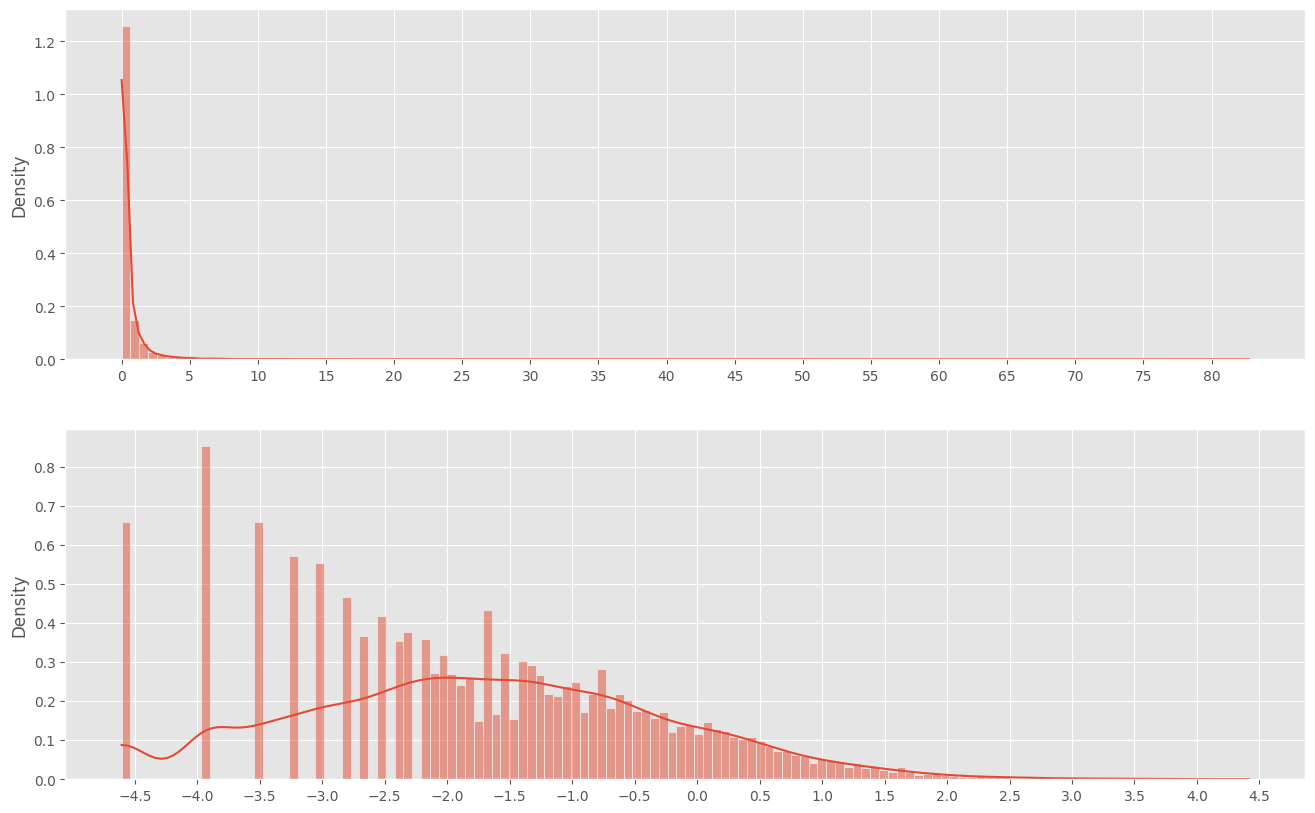

In [1291]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
sns.histplot((global_sales[~(global_sales == 0)]),
             bins=number_bins, kde=True, stat="density", ax=ax1)
ax1.set_xticks([i for i in range(0, 85, 5)])

sns.histplot((np.log(global_sales[~(global_sales == 0)])),
             bins=number_bins, kde=True, stat="density", ax=ax2)
ax2.set_xticks(np.arange(-4.5, 5, 0.5))

plt.show()

In [1292]:
global_sales.describe()

count    16290.000000
mean         0.540670
std          1.567503
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
dtype: float64

In [1293]:
global_sales = pd.Series(np.exp(remove_outliers_iqr(np.log(global_sales))))
global_sales.describe()

c:\Users\enunez\OneDrive\Programming\Python\virtual-environments\.data-science-env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    16236.000000
mean         0.478147
std          0.918384
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         10.790000
dtype: float64

In [1294]:
global_sales = global_sales.dropna()
global_sales

53       10.79
54       10.77
55       10.69
56       10.58
57       10.55
         ...  
16284     0.01
16285     0.01
16286     0.01
16288     0.01
16289     0.01
Length: 16236, dtype: float64

In [1295]:
df = df.iloc[global_sales.index]
df.reset_index(level=0, drop=True, inplace=True)

#### Playtime

En primer lugar, se evalúa el ***playtime*** agrupado por Genre, bajo la suposición de que la duración de un videojuego se ve influenciada por su ***Genre***. Luego, se evalúa visualmente mediante graficos la distribución de ***playtime*** y la ubicación de outliers.

- Se puede observar en la siguiente tabla que la duración es dependiente del género.
- De esta forma, se evaluará la eliminación de outliers filtrados por género

In [1296]:
df.groupby("Genre")["playtime"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3243.0,8.758180,13.045232,1.0,6.000000,8.772424,8.772424,228.0
Adventure,1272.0,5.429660,4.654180,1.0,5.423611,5.423611,5.423611,84.0
Fighting,835.0,5.582778,3.362823,1.0,5.588832,5.588832,5.588832,61.0
Misc,1683.0,4.844375,3.142884,1.0,4.907543,4.907543,4.907543,52.0
Platform,867.0,5.628882,3.973015,1.0,5.744275,5.744275,5.744275,58.0
Puzzle,568.0,3.522399,1.873555,1.0,3.512605,3.512605,3.512605,38.0
Racing,1218.0,7.347437,9.813296,1.0,6.000000,7.357868,7.357868,202.0
Role-Playing,1462.0,14.053536,12.229883,1.0,12.000000,14.106574,14.106574,129.0
Shooter,1272.0,5.590922,6.176630,1.0,3.000000,5.608696,5.608696,75.0


- Se realiza un boxplot filtrado por categoría y se puede observar que hay una gran cantidad de outliers muy alejados de los valores centrales para cada caso.
- Debido a que el rango intercuartil ***(IQR)*** es muy pequeño en relación al rango total de datos resulta inadecuado utilizar un método de eliminación de outliers como ***IQR***. Para este caso, se utilizará el método de ***Z SCORE*** con un ***threshold = 2***.

<Axes: xlabel='Genre', ylabel='playtime'>

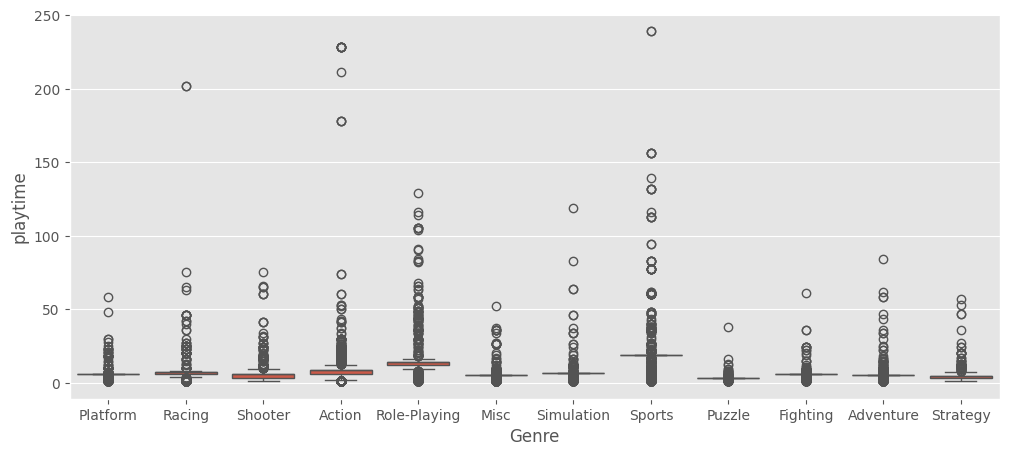

In [1297]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(df, x="Genre", y="playtime", ax=ax)

In [1303]:
playtimes = []

for genre in df.Genre.unique():
    df_genre = df[df.Genre == genre]
    current_playtime = df_genre.playtime

    current_playtime = remove_outliers_z_score(current_playtime)

    current_playtime = current_playtime.dropna()
    
    playtimes.append(current_playtime)

playtimes = pd.concat(playtimes, axis=0)
df = df.iloc[playtimes.index]
df.reset_index(drop=True, inplace=True)

In [1304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15897 entries, 0 to 15896
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15897 non-null  object 
 1   Franchise    15897 non-null  object 
 2   Platform     15897 non-null  object 
 3   Year         15897 non-null  float64
 4   Genre        15897 non-null  object 
 5   Publisher    15897 non-null  object 
 6   NA_Sales     15897 non-null  float64
 7   EU_Sales     15897 non-null  float64
 8   JP_Sales     15897 non-null  float64
 9   Other_Sales  15897 non-null  float64
 10  playtime     15897 non-null  float64
 11  metacritic   15897 non-null  float64
 12  rating       15897 non-null  float64
 13  exceptional  15897 non-null  float64
 14  recommended  15897 non-null  float64
 15  meh          15897 non-null  float64
 16  skip         15897 non-null  float64
 17  esrb_rating  15897 non-null  object 
dtypes: float64(12), object(6)
memory usage: 2.2+ M

<Axes: xlabel='Genre', ylabel='playtime'>

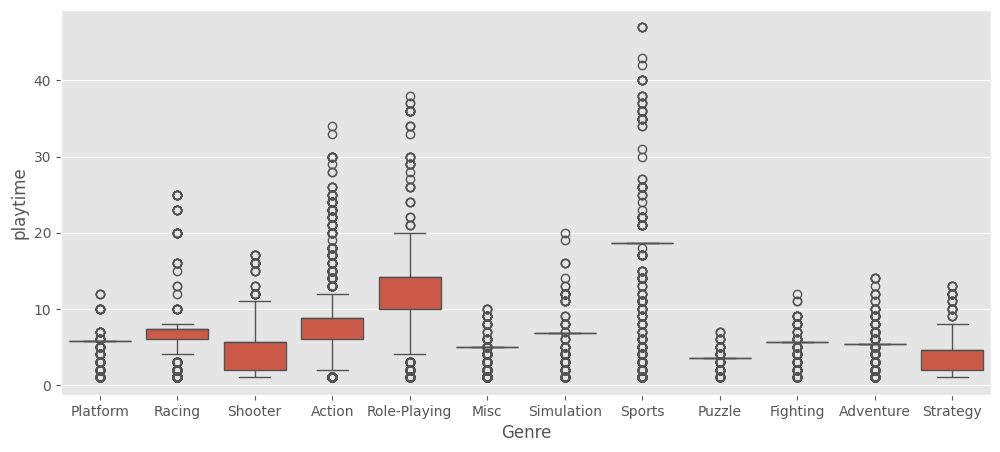

In [1305]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(df, x="Genre", y="playtime", ax=ax)

#### 